In [ ]:
!pip install --upgrade --quiet catboost pandas openpyxl scikit-learn joblib

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from catboost import CatBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

In [ ]:
!pip install numpy==1.26.4

  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.5
    Uninstalling numpy-2.2.5:
      Successfully uninstalled numpy-2.2.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [ ]:
!pip install pandas==2.2.2 --force-reinstall

  Using cached pandas-2.2.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (19 kB)
  Using cached numpy-2.2.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl.metadata (8.4 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached six-1.17.0-py2.py3-none-any.whl.metadata (1.7 kB)
Using cached pandas-2.2.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.0 MB)
Using cached numpy-2.2.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.4 MB)
Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl (229 kB)
Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)
Using cached six-1.17.0-py2.py3-none-any.whl (11 kB)
  Attempting uninstall: pytz
    Found existing installation: pytz 2025.2
    Uninstalli

In [ ]:
import pandas as pd
import numpy as np
import joblib
import scipy
from catboost import CatBoostClassifier

model = CatBoostClassifier()
model.load_model("catboost_news_classifier_1-2.cbm")
tfidf = joblib.load("tfidf_vectorizer_1.pkl")

df = pd.read_excel("РБК. Новости. Главное_tg_parsed_no_emoji.xlsx")

df["text"] = df["text"].fillna("")

X_text = tfidf.transform(df["text"])

preds = model.predict(X_text)
df["predicted_category"] = preds.ravel()

df.to_excel("rbc_tg_with_predictions_text_only.xlsx", index=False)
print("Результат сохранён в файл: rbc_tg_with_predictions_text_only.xlsx")

Результат сохранён в файл: rbc_tg_with_predictions_text_only.xlsx


In [ ]:
import pandas as pd
import numpy as np
import joblib
import scipy
from catboost import CatBoostClassifier

model = CatBoostClassifier()
model.load_model("catboost_news_classifier_1-2.cbm")
tfidf = joblib.load("tfidf_vectorizer_1.pkl")

df = pd.read_excel("РБК. Новости. Главное_tg_parsed_no_emoji.xlsx")

scaling_factor = 300 / df["word_count"].mean()
df["word_count_scaled"] = df["word_count"] * scaling_factor

df["text"] = df["text"].fillna("")
X_text = tfidf.transform(df["text"])
X_combined = scipy.sparse.hstack([X_text, df["word_count_scaled"].values.reshape(-1, 1)])

X_combined = scipy.sparse.hstack([X_text, df["word_count_scaled"].values.reshape(-1, 1)])

preds = model.predict(X_combined)
df["predicted_category_scaled"] = preds.ravel()

df.to_excel("rbc_tg_with_predictions_scaled.xlsx", index=False)
print("Результат сохранён в файл: rbc_tg_with_predictions_scaled.xlsx")

Результат сохранён в файл: rbc_tg_with_predictions_scaled.xlsx


In [ ]:
import pandas as pd
import numpy as np
import joblib
import scipy
from catboost import CatBoostClassifier

model = CatBoostClassifier()
model.load_model("catboost_news_classifier_1-2.cbm")
tfidf = joblib.load("tfidf_vectorizer_1.pkl")

df = pd.read_excel("final_dataset_limited_600_per_category.xlsx")

df["text"] = df["text"].fillna("")

X_text = tfidf.transform(df["text"])

df["word_count"] = df["word_count"].fillna(0)
X_combined = scipy.sparse.hstack([
    X_text,
    df["word_count"].values.reshape(-1, 1)
])

preds = model.predict(X_combined)
df["predicted_category"] = preds.ravel()

df.to_excel("rbc_tg_with_predictions_no_scaling.xlsx", index=False)
print("Результат сохранён в файл: rbc_tg_with_predictions_no_scaling.xlsx")

Результат сохранён в файл: rbc_tg_with_predictions_no_scaling.xlsx


In [ ]:
df.head()

,project,type,category,title,publish_date,fronturl,picture,overview,text,word_count,predicted_category
0,РБК,short_news,Авто,Глава АвтоВАЗа заявил о снижении продаж в феврале,2025-02-25T22:18:33+03:00,https://www.rbc.ru/rbcfreenews/67be10c59a79474...,1,NaN,В феврале 2025 года концерн АвтоВАЗ ожидает сн...,304,Бизнес
1,РБК,short_news,Авто,Юрист напомнил о штрафах за мытье машины на да...,2025-03-23T10:32:08+03:00,https://www.rbc.ru/rbcfreenews/67dfb71e9a79479...,1,NaN,Сотрудники ГИБДД могут оштрафовать автомобилис...,290,Общество
2,РБК,short_news,Авто,Минпромторг представил список облагаемых налог...,2025-03-29T19:43:30+03:00,https://www.rbc.ru/rbcfreenews/67e81d279a7947d...,1,В первый список внесены 303 модели средней сто...,Минпромторг России составил список дорогостоящ...,333,Бизнес
3,Autonews,short_news,Авто,В России стартовали продажи Volkswagen Golf. Н...,2025-01-06T22:51:30+03:00,https://www.autonews.ru/news/677bdc9b9a7947668...,1,NaN,В России возобновили продажи новых хэтчбеков V...,175,Авто
4,Autonews,short_news,Авто,В России назвали самые популярные пикапы. Цены...,2025-01-06T15:11:35+03:00,https://www.autonews.ru/news/677bc85d9a7947904...,1,NaN,"В России резко вырос спрос на пикапы. Так, по ...",403,Авто


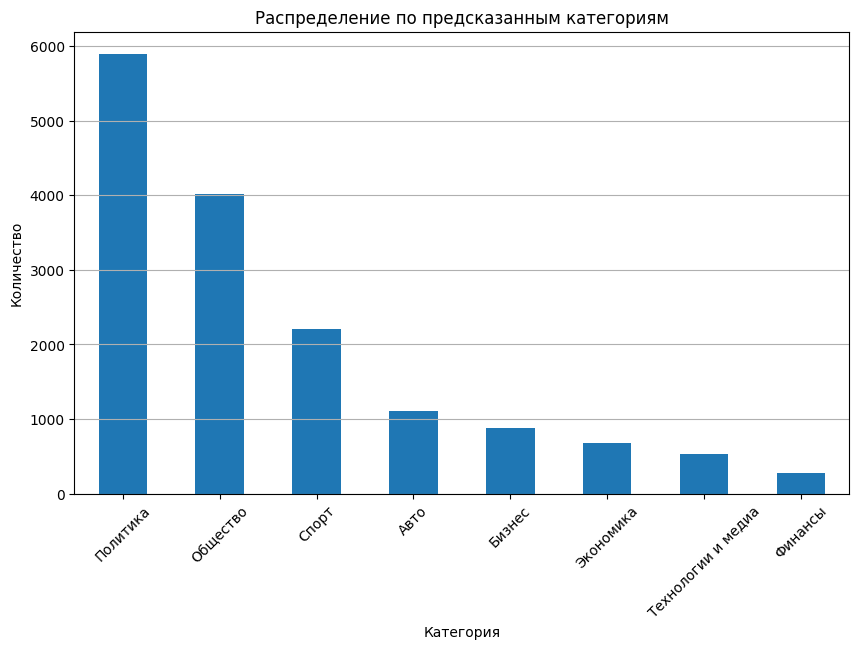

In [ ]:
import matplotlib.pyplot as plt

category_counts = df["predicted_category"].value_counts()

plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar')
plt.xlabel("Категория")
plt.ylabel("Количество")
plt.title("Распределение по предсказанным категориям")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [ ]:
print("Число строк в данных:", len(df))
print("Размер X_text:", X_text.shape)
print("Ненулевых элементов в матрице:", X_text.nnz)
print("Средняя плотность (ненулевые/размер):", X_text.nnz / (X_text.shape[0] * X_text.shape[1]))

Число строк в данных: 300
Размер X_text: (300, 5000)
Ненулевых элементов в матрице: 8520
Средняя плотность (ненулевые/размер): 0.00568


In [ ]:
from collections import Counter

all_words = " ".join(df["text"]).split()
word_counts = Counter(all_words)
print(word_counts.most_common(20))

[('в', 740), ('и', 398), ('на', 352), ('—', 223), ('с', 160), ('РБК', 155), ('что', 134), ('по', 130), ('не', 117), ('В', 110), ('за', 85), ('к', 75), ('о', 73), ('телеграм-канале', 70), ('из', 69), ('дня', 61), ('от', 52), ('для', 47), ('–', 47), ('а', 46)]


In [ ]:
nonzero_columns = X_text.sum(axis=0).A1 > 0
print(f"Из 5000 признаков активны: {nonzero_columns.sum()}")

Из 5000 признаков активны: 2504


In [ ]:
import pandas as pd
import joblib
from catboost import CatBoostClassifier

model = CatBoostClassifier()
model.load_model("catboost_news_classifier_1-2.cbm")
tfidf = joblib.load("tfidf_vectorizer_1.pkl")

df = pd.read_excel("parsed_data_with_word_count.xlsx")

df["text"] = df["text"].fillna("")

X_text = tfidf.transform(df["text"])

preds = model.predict(X_text)

df["predicted_category"] = preds.ravel()
df.to_excel("rbc_predictions_no_wordcount.xlsx", index=False)

print("Готово! Результаты сохранены в файл: rbc_predictions_no_wordcount.xlsx")

Готово! Результаты сохранены в файл: rbc_predictions_no_wordcount.xlsx


In [ ]:
proba = model.predict_proba(X_text)
df["max_proba"] = proba.max(axis=1)

In [ ]:
df.head()

,id,project,project_nick,type,category,title,body,publish_date,fronturl,picture,_score,overview,text,word_count,predicted_category
0,677c3c699a79471ec81f21c2,РБК,rbcnews,article,Общество,Взрыв газа произошел в жилом доме в Петрозаводске,На данный момент известно о трех пострадавших....,2025-01-06T23:27:29+03:00,https://www.rbc.ru/society/06/01/2025/677c3c69...,0,1.0,На данный момент известно о трех пострадавших....,Взрыв газа произошел в одной из квартир пятиэт...,252,Общество
1,677c3b7d9a79471ec81f21c0,РБК,rbcnews,short_news,Общество,Шесть снегоходов с людьми провалились под лед ...,NaN,2025-01-06T23:25:20+03:00,https://www.rbc.ru/rbcfreenews/677c3b7d9a79471...,0,1.0,NaN,В Прионежском районе Карелии шесть снегоходов ...,253,Общество
2,677c37e09a7947030de47f4b,РБК,rbcnews,article,Политика,Во Франции сообщили о «десятках» дезертиров ср...,О массовом дезертирстве из бригады ВСУ «Анна К...,2025-01-06T23:16:17+03:00,https://www.rbc.ru/politics/06/01/2025/677c37e...,1,1.0,О массовом дезертирстве из бригады ВСУ «Анна К...,"Министерство обороны Франции подтвердило, что ...",390,Политика
3,677c2f609a7947475c99fcce,РБК,rbcnews,article,Политика,США сняли санкции с операций по энергоресурсам...,"О том, что США смягчат санкции против Сирии, н...",2025-01-06T22:42:45+03:00,https://www.rbc.ru/politics/06/01/2025/677c2f6...,1,1.0,"О том, что США смягчат санкции против Сирии, н...",Соединенные Штаты вывели из-под санкций ряд фи...,491,Политика
4,677c2cc49a7947b695efd435,РБК,rbcnews,article,Политика,"Bild узнал, что глава сирийского Минюста приго...","В Сети появились видео 10-летней давности, на ...",2025-01-06T22:28:57+03:00,https://www.rbc.ru/politics/06/01/2025/677c2cc...,0,1.0,"В Сети появились видео 10-летней давности, на ...","Министр юстиции Сирии Шади Аль-Вайси, назначен...",396,Политика


In [ ]:
import pandas as pd
from sklearn.metrics import classification_report

y_true = df['category'].fillna('missing').astype(str)
y_pred = df['predicted_category'].fillna('missing').astype(str)

report = classification_report(
    y_true,
    y_pred,
    zero_division=0
)

print(report)

                    precision    recall  f1-score   support

           missing       0.00      0.00      0.00        19
              Авто       0.90      1.00      0.95      1004
       База знаний       0.00      0.00      0.00        76
            Бизнес       0.50      0.85      0.63       519
          Общество       0.69      0.80      0.74      3479
          Политика       0.94      0.76      0.84      7306
             Спорт       0.96      0.94      0.95      2248
Технологии и медиа       0.58      0.84      0.68       366
           Финансы       0.73      0.84      0.78       244
         Экономика       0.40      0.79      0.53       338

          accuracy                           0.81     15599
         macro avg       0.57      0.68      0.61     15599
      weighted avg       0.84      0.81      0.82     15599



In [ ]:
import pandas as pd
import joblib
from catboost import CatBoostClassifier

model = CatBoostClassifier()
model.load_model("catboost_news_classifier_1-2.cbm")

tfidf = joblib.load("tfidf_vectorizer_1.pkl")

df = pd.read_excel("РБК. Новости. Главное_tg_parsed_no_emoji.xlsx")
df["text"] = df["text"].fillna("")

X_text = tfidf.transform(df["text"]).toarray()

preds = model.predict(X_text)
probs = model.predict_proba(X_text)

df["predicted_category"] = preds.ravel()
df["confidence"] = probs.max(axis=1)

df.to_excel("rbc_tg_predictions.xlsx", index=False)

print("✅ Готово! Файл rbc_tg_predictions.xlsx")

✅ Готово! Файл rbc_tg_predictions.xlsx


In [ ]:
df["target"].value_counts()

KeyError: 'target'

In [ ]:
tfidf_features = set(tfidf.get_feature_names_out())

print(f"Число признаков в обучающем векторизаторе: {len(tfidf_features)}")

import re

def extract_words(text):
    return re.findall(r'\b\w+\b', text.lower())

all_words = set()
for txt in df["text"]:
    all_words.update(extract_words(str(txt)))

print(f"Число уникальных слов в новых данных: {len(all_words)}")

common_words = tfidf_features.intersection(all_words)
print(f"Число пересекающихся слов: {len(common_words)}")

percent_overlap = len(common_words) / len(tfidf_features) * 100
print(f"Процент пересечения признаков: {percent_overlap:.2f}%")

print("Примеры совпадающих слов:", list(common_words)[:20])

Число признаков в обучающем векторизаторе: 5000
Число уникальных слов в новых данных: 6527
Число пересекающихся слов: 2504
Процент пересечения признаков: 50.08%
Примеры совпадающих слов: ['министр', 'самым', 'сотрудника', 'меры', 'текущего', 'сбер', 'выход', 'соцсети', 'одного', 'прошел', 'факторов', 'округе', 'ведущий', 'приняли', 'мир', 'позже', 'пояснил', 'ситуация', 'ключевых', 'подготовке']


In [ ]:
print("Макс фичей:", tfidf.max_features)
print("min_df:", tfidf.min_df)
print("stop_words:", tfidf.stop_words)

Макс фичей: 5000
min_df: 5
stop_words: None


In [ ]:
print("Признаки в векторизаторе:", tfidf.get_feature_names_out()[:20])

Признаки в векторизаторе: ['00' '000' '01' '05' '06' '08' '10' '100' '105' '11' '110' '112' '12'
 '120' '13' '130' '14' '140' '15' '150']


In [ ]:
print("Классы в модели:", model.classes_)

Классы в модели: ['Авто' 'Бизнес' 'Жилье' 'Общество' 'Политика' 'Спорт'
 'Технологии и медиа' 'Финансы' 'Экономика']


In [ ]:
df.head()

,date,text,link,picture,video,word_count,predicted_category,confidence
0,2025-05-08 07:54:01,"Аэропорты Москвы — Шереметьево, Внуково, Домод...",https://t.me/rbc_news/117689,0,0,52,Авто,0.928646
1,2025-05-08 07:36:28,"Си Цзиньпин заявил, что 80 лет назад «китайски...",https://t.me/rbc_news/117688,0,0,72,Авто,0.937578
2,2025-05-08 07:27:13,"Путин сказал, что будет рад «вновь посетить др...",https://t.me/rbc_news/117687,0,1,28,Авто,0.949830
3,2025-05-08 07:18:55,В Кремле началась встреча Путина и Си Цзиньпин...,https://t.me/rbc_news/117686,0,1,16,Авто,0.853220
4,2025-05-08 07:11:21,Истребители Индии и Пакистана сразились в возд...,https://t.me/rbc_news/117685,1,0,152,Авто,0.857692


In [ ]:
import pandas as pd
import joblib
from catboost import CatBoostClassifier

model = CatBoostClassifier()
model.load_model("catboost_news_classifier_1-2.cbm")
tfidf = joblib.load("tfidf_vectorizer_1.pkl")

df = pd.read_excel("РБК. Новости. Главное_tg_parsed_no_emoji.xlsx")
df["text"] = df["text"].fillna("")

X_text = tfidf.transform(df["text"])

probs = model.predict_proba(X_text)
preds = model.predict(X_text)

df["predicted_category"] = preds.ravel()
df["prediction_confidence"] = probs.max(axis=1)

df.to_excel("rbc_tg_with_predictions_with_confidence.xlsx", index=False)

print("Готово! Файл: rbc_tg_with_predictions_with_confidence.xlsx")

Готово! Файл: rbc_tg_with_predictions_with_confidence.xlsx


In [ ]:
import pandas as pd
import numpy as np
import joblib
from catboost import CatBoostClassifier
import scipy

model = CatBoostClassifier()
model.load_model("catboost_news_classifier_1.cbm")
tfidf = joblib.load("tfidf_vectorizer_1 (1).pkl")

df = pd.read_excel("РБК. Новости. Главное_tg_parsed_no_emoji.xlsx")
df = df.dropna(subset=["text"])

X_text = tfidf.transform(df["text"])
X_combined = scipy.sparse.hstack([X_text, df["word_count"].values.reshape(-1, 1)])

preds = model.predict(X_combined)
df["predicted_category"] = preds.ravel()

df.to_excel("rbc_tg_with_predictions.xlsx", index=False)
print("Сохранено в файл: rbc_tg_with_predictions.xlsx")

Сохранено в файл: rbc_tg_with_predictions.xlsx


In [ ]:
df.head()

,date,text,link,picture,video,word_count,predicted_category
0,2025-05-08 07:54:01,"Аэропорты Москвы — Шереметьево, Внуково, Домод...",https://t.me/rbc_news/117689,0,0,52,Авто
1,2025-05-08 07:36:28,"Си Цзиньпин заявил, что 80 лет назад «китайски...",https://t.me/rbc_news/117688,0,0,72,Авто
2,2025-05-08 07:27:13,"Путин сказал, что будет рад «вновь посетить др...",https://t.me/rbc_news/117687,0,1,28,Авто
3,2025-05-08 07:18:55,В Кремле началась встреча Путина и Си Цзиньпин...,https://t.me/rbc_news/117686,0,1,16,Авто
4,2025-05-08 07:11:21,Истребители Индии и Пакистана сразились в возд...,https://t.me/rbc_news/117685,1,0,152,Авто
